In [13]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
df = pd.read_csv("apps.csv")
print("Columns:", df.columns.tolist())
df.head()


Columns: ['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
# Ensure 'Installs' is string before cleaning
if df['Installs'].dtype != 'O':  # Not object type (i.e., it's numeric)
    df['Installs'] = df['Installs'].astype(str)

# Clean and convert 'Installs'
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Clean and convert 'Price'
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)

# Optional: preview cleaned values
print("Sample Installs:", df['Installs'].unique()[:5])
print("Sample Prices:", df['Price'].unique()[:5])


Sample Installs: [   10000   500000  5000000 50000000   100000]
Sample Prices: [0.]


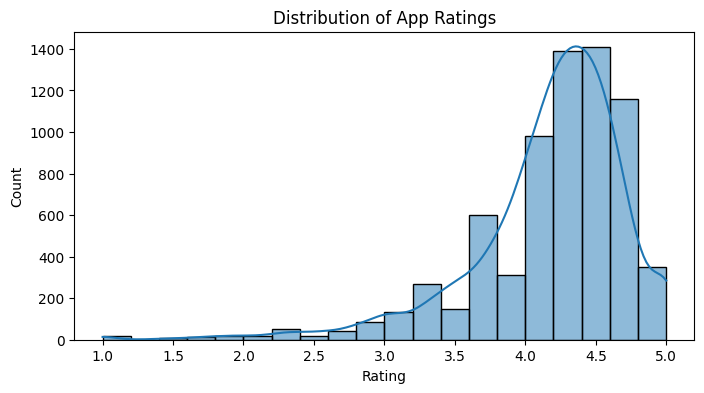

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.show()


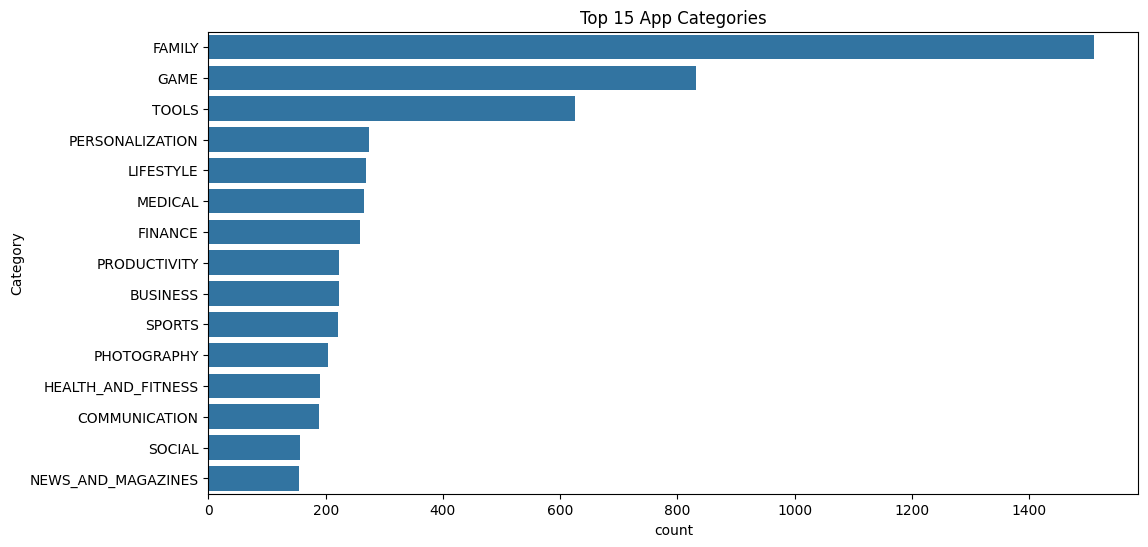

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index[:15])
plt.title("Top 15 App Categories")
plt.show()


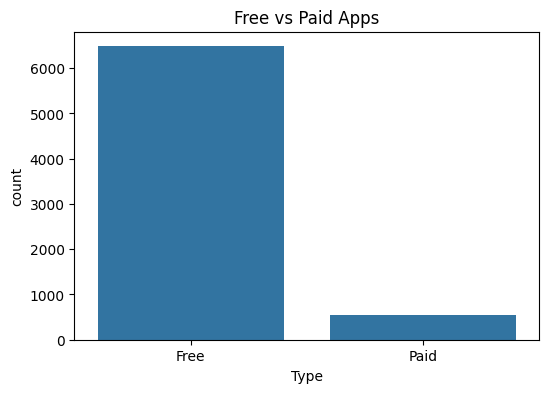

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type')
plt.title("Free vs Paid Apps")
plt.show()


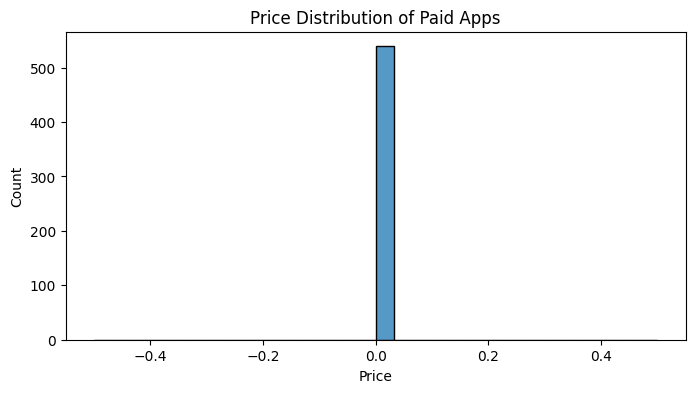

In [20]:
plt.figure(figsize=(8, 4))
df_paid = df[df['Type'] == 'Paid']
sns.histplot(df_paid['Price'], bins=30)
plt.title("Price Distribution of Paid Apps")
plt.show()


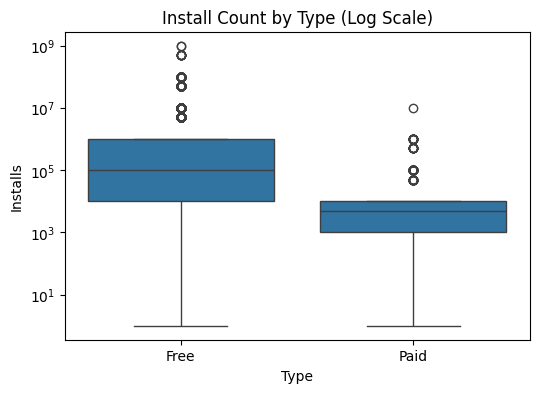

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Type', y='Installs', data=df)
plt.yscale('log')
plt.title("Install Count by Type (Log Scale)")
plt.show()
